In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import RFE ,SelectKBest, chi2, f_regression, SelectFromModel
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, Imputer, normalize, RobustScaler, PowerTransformer ,QuantileTransformer 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from itertools import compress
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import regression, make_scorer ,mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.linear_model import ARDRegression, HuberRegressor,LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.pipeline import Pipeline
## outlier:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM


In [2]:

data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

In [4]:
nullity = dict()
for column in data.columns:
    nullity[column] = data[column].isna().sum()/data.shape[0]
    print(column, nullity[column])

Id 0.0
MSSubClass 0.0
MSZoning 0.0
LotFrontage 0.1773972602739726
LotArea 0.0
Street 0.0
Alley 0.9376712328767123
LotShape 0.0
LandContour 0.0
Utilities 0.0
LotConfig 0.0
LandSlope 0.0
Neighborhood 0.0
Condition1 0.0
Condition2 0.0
BldgType 0.0
HouseStyle 0.0
OverallQual 0.0
OverallCond 0.0
YearBuilt 0.0
YearRemodAdd 0.0
RoofStyle 0.0
RoofMatl 0.0
Exterior1st 0.0
Exterior2nd 0.0
MasVnrType 0.005479452054794521
MasVnrArea 0.005479452054794521
ExterQual 0.0
ExterCond 0.0
Foundation 0.0
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinSF1 0.0
BsmtFinType2 0.026027397260273973
BsmtFinSF2 0.0
BsmtUnfSF 0.0
TotalBsmtSF 0.0
Heating 0.0
HeatingQC 0.0
CentralAir 0.0
Electrical 0.0006849315068493151
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
BsmtFullBath 0.0
BsmtHalfBath 0.0
FullBath 0.0
HalfBath 0.0
BedroomAbvGr 0.0
KitchenAbvGr 0.0
KitchenQual 0.0
TotRmsAbvGrd 0.0
Functional 0.0
Fireplaces 0.0
F

In [5]:
# drop columns with nullity>0.40
data_pure = data.copy()
for k,v in nullity.items():
    print(k)
    if v>0.4:
        print('===droped===')
        data_pure = data_pure.drop(k, axis = 1)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
===droped===
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
===droped===
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
===droped===
Fence
===droped===
MiscFeature
===droped===
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


In [6]:
data_pure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [7]:
numeric_column = data_pure.select_dtypes('number').columns
object_column = data_pure.select_dtypes(object).columns

In [8]:
object_column

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [9]:
numeric_column

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

## lets check importance of numeric columns before puring

In [10]:
corr = data_pure.corr()

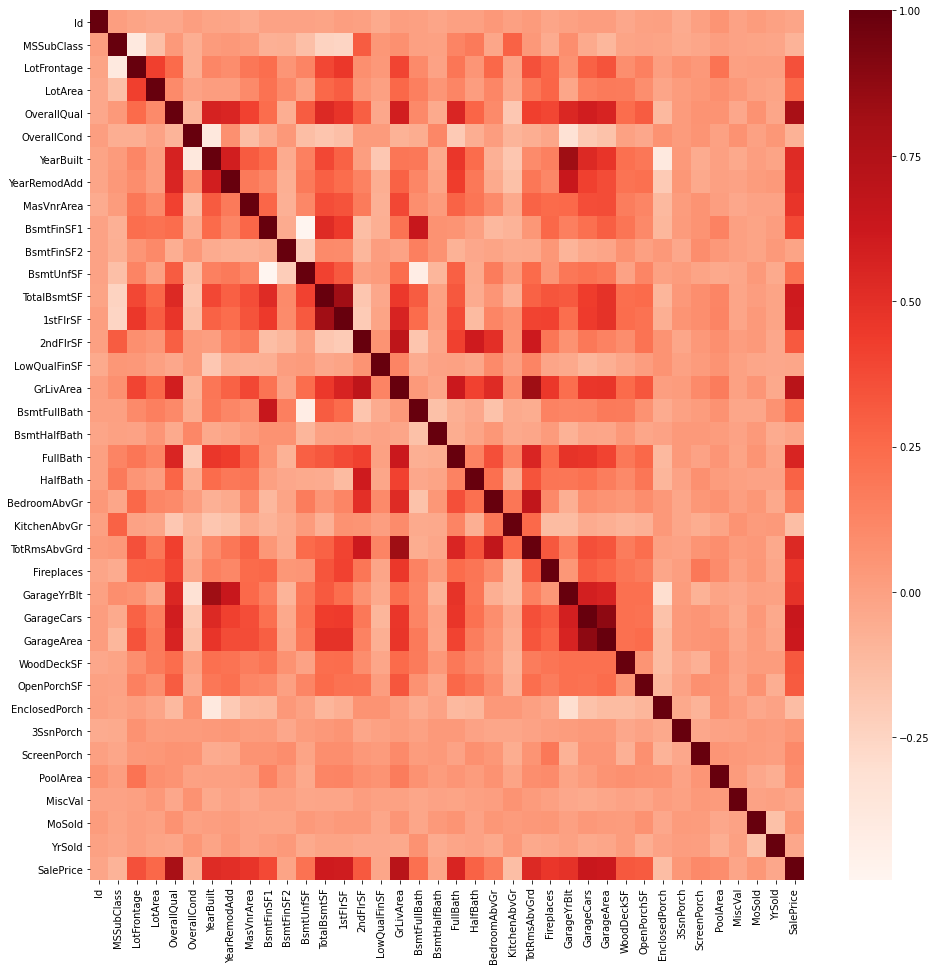

In [11]:
plt.figure(figsize=(16,16))
sns.heatmap(corr, cmap=plt.cm.Reds)

In [12]:
corr['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [13]:
reg = LassoCV()
X_ = data_pure.dropna()
X= X_[numeric_column].drop('SalePrice',axis=1)
y =X_.SalePrice.ravel()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 206252.645558
Best score using built-in LassoCV: 0.714300


E:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Text(0.5, 1.0, 'Feature importance using Lasso Model')

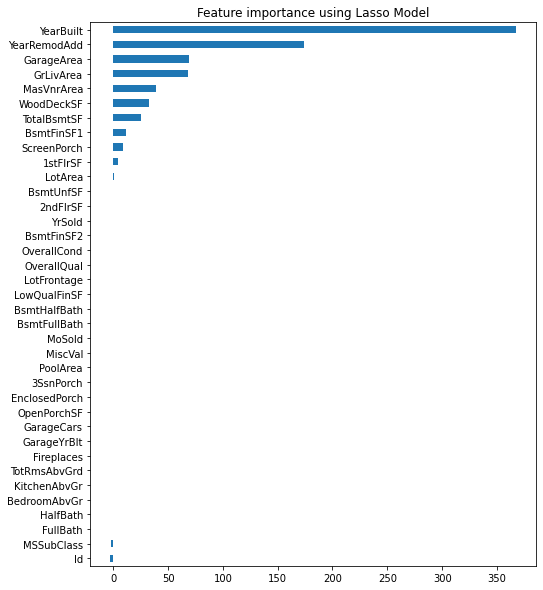

In [14]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")


In [15]:
sel_ = SelectFromModel(LassoCV())
sel_.fit(X, y)

E:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv='warn',
                                  eps=0.001, fit_intercept=True, max_iter=1000,
                                  n_alphas=100, n_jobs=None, normalize=False,
                                  positive=False, precompute='auto',
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, verbose=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [16]:
X.columns[sel_.get_support()]

Index(['Id', 'MSSubClass', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')

In [17]:
le = LabelEncoder()
X_2 = data_pure.dropna()
X_3 = X_2[object_column]


In [18]:
for column in object_column:
    X_3[column] = le.fit_transform(X_3[column])

C:\Users\98914\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
X_3.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,5,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,5,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,5,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,5,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,5,1,1,4,4,2,8,4


In [20]:
fs = SelectKBest(score_func=chi2, k=10)
fs.fit(X_3, X_2['SalePrice'])

SelectKBest(k=10, score_func=<function chi2 at 0x0000021BE647A510>)

In [21]:
fs.pvalues_

array([1.00000000e+000, 1.00000000e+000, 5.08013307e-001, 1.00000000e+000,
                   nan, 9.99986020e-001, 3.46977858e-004, 9.71525314e-149,
       1.00000000e+000, 1.00000000e+000, 5.52633682e-130, 9.14419030e-003,
       1.00000000e+000, 1.00000000e+000, 1.65993858e-002, 7.85044253e-005,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 9.99999995e-001, 1.28564890e-002,
       1.00000000e+000, 7.05211376e-004, 5.70605774e-060, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.51776842e-017,
       9.99999289e-001, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000])

In [22]:
fs.get_support()

array([False, False, False, False, False, False,  True,  True, False,
       False,  True,  True, False, False,  True,  True, False, False,
       False, False, False, False, False,  True, False,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False])

In [23]:
sc = fs.scores_
sc

array([ 105.58681448,    3.09669725,  557.66254755,   99.63110173,
                 nan,  429.7969086 ,  679.46557907, 1921.59778491,
        198.54488965,   10.51276872, 1798.36778939,  640.93435552,
        286.09600658,  139.96419937,  632.54765922,  694.32348249,
        142.91114873,  183.20253968,   27.81506572,  239.93601269,
        315.82329017,   89.04721331,  388.14625731,  636.21511861,
         87.90998183,  671.90517598, 1292.23294106,   34.31493688,
        164.61217427,  262.93249105,   46.46857287,  889.93064339,
        412.33366773,   63.97985174,   38.78314046,   51.31563749,
        167.94079086,  173.15754481])

In [24]:
sc_dict= dict()
ind = 0
for v in sc:
    sc_dict[ind] = v
    ind +=1

In [25]:
sorted(sc_dict.items(), key=lambda x:x[1])

[(1, 3.0966972477064054),
 (18, 27.81506572499552),
 (27, 34.3149368756516),
 (34, 38.783140464451726),
 (30, 46.46857287129999),
 (35, 51.31563749069781),
 (33, 63.97985173598069),
 (24, 87.90998182690356),
 (21, 89.04721330624986),
 (3, 99.63110172804679),
 (0, 105.58681447634302),
 (13, 139.96419937281613),
 (16, 142.91114873064427),
 (2, 557.6625475506308),
 (4, nan),
 (9, 10.512768717837094),
 (28, 164.61217426678357),
 (36, 167.94079085720588),
 (37, 173.15754480653908),
 (17, 183.20253968253903),
 (8, 198.54488964576421),
 (19, 239.9360126942033),
 (29, 262.93249104655706),
 (12, 286.09600658272143),
 (20, 315.8232901687171),
 (22, 388.1462573133154),
 (32, 412.3336677264908),
 (5, 429.7969085984204),
 (14, 632.5476592220035),
 (23, 636.2151186058334),
 (11, 640.9343555210565),
 (25, 671.9051759834398),
 (6, 679.4655790711387),
 (15, 694.3234824897296),
 (31, 889.9306433928942),
 (26, 1292.2329410575328),
 (10, 1798.3677893921847),
 (7, 1921.5977849121084)]

take most important features:
imp_object = [7,10,26,31,15,6,25,11,23,14]
numeric = ['YearBuilt','YearRemodAdd', 'GarageArea', 'GrLivArea', 'MasVnrArea', 'WoodDeckSF', 'TotalBsmtSF', 'BsmtFinSF1', 'SceenProch', '1stFirSF']

In [26]:
imp_object = list(X_3.columns[[7,10,26,31,15,6,25,11,23,14]])
imp_numeric = ['YearBuilt','YearRemodAdd', 'GarageArea', 'GrLivArea', 'MasVnrArea', 'WoodDeckSF', 'TotalBsmtSF', 'BsmtFinSF1', 'ScreenPorch', '1stFlrSF']
imp_columns = imp_object + imp_numeric

In [27]:
data_pure_copy = data_pure.dropna()
data_imp = data_pure_copy[imp_columns]
for column in data_imp.select_dtypes(object).columns:
    data_imp[column] = le.fit_transform(data_imp[column])

C:\Users\98914\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [28]:
X_train, X_test, y_train, y_test = train_test_split(data_imp, data_pure_copy.SalePrice, test_size=0.3)

In [29]:
base_model = DecisionTreeRegressor(max_depth=5)
base_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [30]:
score = base_model.score(X_test, y_test)

In [31]:
score

0.5193621963219777

In [32]:
imp_object

['Neighborhood',
 'BldgType',
 'HeatingQC',
 'GarageType',
 'Exterior2nd',
 'LandSlope',
 'Heating',
 'HouseStyle',
 'BsmtFinType1',
 'Exterior1st']

In [33]:
chi2_contingency(pd.crosstab(data_imp.Neighborhood, data_imp.BldgType))[1]

6.369214434822377e-120

chi2 test:
Null Hypothesis (H0): There is no relationship between the variables

Alternative Hypothesis (H1): There is a relationship between variables

In [34]:
test_result = dict()
independent = list()
for c1 in imp_object:
    for c2 in imp_object:
        if c1!=c2:
            if (c2,c1) not in test_result:
                result = chi2_contingency(pd.crosstab(data_imp[c1], data_imp[c2]))[1]
                if result < 0.05:
                    print('{},{} are  related'.format(c1,c2))
                    
                else:
                    independent.append((c1,c2))
                    print('{},{} are not related'.format(c1,c2))
                    
                test_result[(c1,c2)] = result
                

# test_result

Neighborhood,BldgType are  related
Neighborhood,HeatingQC are  related
Neighborhood,GarageType are  related
Neighborhood,Exterior2nd are  related
Neighborhood,LandSlope are  related
Neighborhood,Heating are not related
Neighborhood,HouseStyle are  related
Neighborhood,BsmtFinType1 are  related
Neighborhood,Exterior1st are  related
BldgType,HeatingQC are  related
BldgType,GarageType are  related
BldgType,Exterior2nd are  related
BldgType,LandSlope are not related
BldgType,Heating are  related
BldgType,HouseStyle are  related
BldgType,BsmtFinType1 are  related
BldgType,Exterior1st are  related
HeatingQC,GarageType are  related
HeatingQC,Exterior2nd are  related
HeatingQC,LandSlope are not related
HeatingQC,Heating are  related
HeatingQC,HouseStyle are  related
HeatingQC,BsmtFinType1 are  related
HeatingQC,Exterior1st are  related
GarageType,Exterior2nd are  related
GarageType,LandSlope are  related
GarageType,Heating are  related
GarageType,HouseStyle are  related
GarageType,BsmtFinType1

In [35]:
independent

[('Neighborhood', 'Heating'),
 ('BldgType', 'LandSlope'),
 ('HeatingQC', 'LandSlope'),
 ('LandSlope', 'HouseStyle'),
 ('LandSlope', 'BsmtFinType1'),
 ('Heating', 'BsmtFinType1')]

In [36]:
imp_object = ['Neighborhood', 'Heating','BldgType', 'LandSlope','HouseStyle','BsmtFinType1']
imp_columns = imp_object + imp_numeric

data_pure_copy = data_pure.dropna()
data_imp = data_pure_copy[imp_columns]
for column in data_imp.select_dtypes(object).columns:
    data_imp[column] = le.fit_transform(data_imp[column])

X_train, X_test, y_train, y_test = train_test_split(data_imp, data_pure_copy.SalePrice, test_size=0.3,random_state =42 )
base_model = DecisionTreeRegressor(max_depth=5)
base_model.fit(X_train, y_train)
base_model.score(X_test, y_test)

C:\Users\98914\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


0.7035208761079064

In [37]:
X_train.head()

,Neighborhood,Heating,BldgType,LandSlope,HouseStyle,BsmtFinType1,YearBuilt,YearRemodAdd,GarageArea,GrLivArea,MasVnrArea,WoodDeckSF,TotalBsmtSF,BsmtFinSF1,ScreenPorch,1stFlrSF
857,8,0,0,0,5,5,1994,1995,343,1481,0.0,0,702,0,0,702
1391,12,0,2,0,2,5,1967,1967,792,1584,0.0,0,1584,0,0,1584
329,9,0,0,0,5,5,1920,1950,189,1192,0.0,0,596,0,0,596
1052,12,0,0,0,5,4,1964,1978,540,1977,272.0,0,816,442,0,1127
630,17,0,0,0,5,5,1880,1991,240,1750,0.0,0,636,0,0,1089


In [38]:
f_scores = f_regression(X_train[imp_object] , y_train)

In [39]:
f_scores

(array([39.64424613,  2.41187027,  6.39646892,  0.41785397, 23.78744862,
         1.25311998]),
 array([5.13976794e-10, 1.20833088e-01, 1.16351377e-02, 5.18204202e-01,
        1.30973053e-06, 2.63309682e-01]))

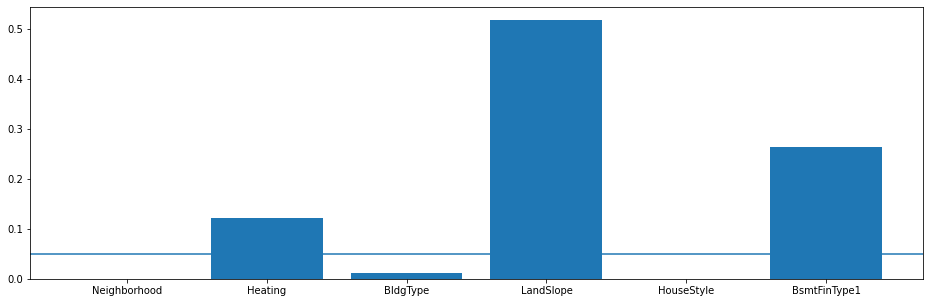

In [40]:
plt.figure(figsize=(16,5))
plt.bar(imp_object,f_scores[1])
plt.axhline(0.05)
# f_scores[1].shape

In [41]:
# drop LandSlope

imp_columns = imp_object + imp_numeric
imp_columns.remove('LandSlope')
data_pure_copy = data_pure.dropna()
data_imp = data_pure_copy[imp_columns]
for column in data_imp.select_dtypes(object).columns:
    data_imp[column] = le.fit_transform(data_imp[column])

X_train, X_test, y_train, y_test = train_test_split(data_imp, data_pure_copy.SalePrice, test_size=0.3,random_state =42 )
base_model = DecisionTreeRegressor(max_depth=5)
base_model.fit(X_train, y_train)
base_model.score(X_test, y_test)

C:\Users\98914\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.7005355752981446

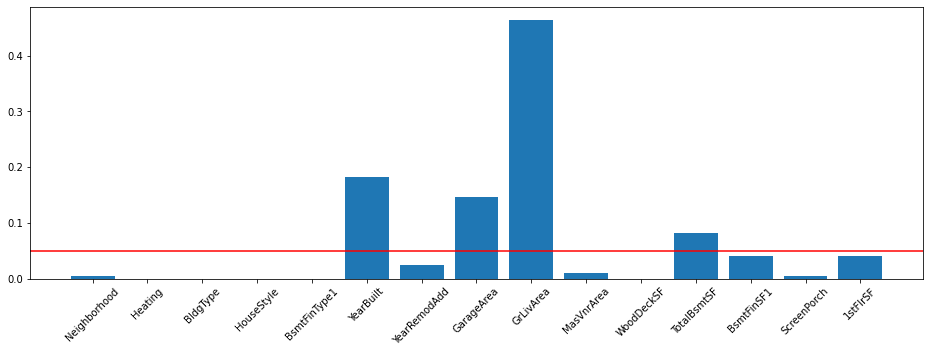

In [42]:
plt.figure(figsize=(16,5))
plt.bar(imp_columns,base_model.feature_importances_)
plt.xticks(rotation=45)
plt.axhline(0.05, color='r')
plt.show()

In [43]:
imp2 = list(compress(imp_columns,list(base_model.feature_importances_ >0.05)))
imp2 

['YearBuilt', 'GarageArea', 'GrLivArea', 'TotalBsmtSF']

In [44]:
data_imp = data_pure_copy[imp2]
for column in data_imp.select_dtypes(object).columns:
    data_imp[column] = le.fit_transform(data_imp[column])

X_train, X_test, y_train, y_test = train_test_split(data_imp, data_pure_copy.SalePrice, test_size=0.3,random_state =42 )
base_model = DecisionTreeRegressor(max_depth=5)
base_model.fit(X_train, y_train)
base_model.score(X_test, y_test)

0.7423258314828132

In [45]:
parameters = [{'n_estimators' :[50,100,120,150], 'max_features' :('auto', 'sqrt'), 
             'criterion':('mae', 'mse'),'random_state':[42], 'max_depth':[10,20,30,40,50]}]
scorer = make_scorer(mean_squared_error, greater_is_better=False)
rfc_model = RandomForestRegressor()
gs = GridSearchCV(rfc_model,param_grid=parameters, n_jobs=-1, cv=5, scoring = scorer)
gs.fit(X_train, y_train)

# rfc_model.score(X_test, y_test)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'criterion': ('mae', 'mse'),
   

In [46]:
best_model = gs.best_estimator_
best_model.score(X_test, y_test)

0.8323251386194047

In [47]:
gs.best_params_

{'criterion': 'mae',
 'max_depth': 30,
 'max_features': 'sqrt',
 'n_estimators': 120,
 'random_state': 42}

In [48]:
rfc_model = RandomForestRegressor(criterion= 'mae',
 max_features= 'auto',
 n_estimators= 150,
 random_state= 42, min_samples_split=2)
rfc_fit = rfc_model.fit(X_train, y_train)
rfc_fit.score(X_test, y_test)

0.8395689092061022

In [49]:
gb = GradientBoostingRegressor(max_depth=5,n_estimators=120,random_state=42).fit(X_train, y_train)
gb.score(X_test, y_test)

0.8303286774543815

In [50]:
for l in np.arange(0.4,1,0.1):
    ab =AdaBoostRegressor(random_state=42,n_estimators=30,base_estimator=rfc_fit,learning_rate=l ).fit(X_train, y_train)
    print('Lr={}, accuracy = {}'.format(str(l), str(ab.score(X_test, y_test))))

Lr=0.4, accuracy = 0.8365265807963979
Lr=0.5, accuracy = 0.8376325546251556
Lr=0.6, accuracy = 0.8406352841846976
Lr=0.7, accuracy = 0.8383580533567255
Lr=0.7999999999999999, accuracy = 0.8424780516359993
Lr=0.8999999999999999, accuracy = 0.8392611343060132


In [51]:
ab =AdaBoostRegressor(random_state=42,n_estimators=30,base_estimator=rfc_fit,learning_rate=0.8 ).fit(X_train, y_train)
ab.score(X_test, y_test)

0.8424780516359993

In [52]:
mean_absolute_error(y_test,ab.predict(X_test))

22063.97093211753

In [53]:
y_test[:10]

634     144000
194     127000
117     155000
1249    119000
969     140000
1366    193000
383      76000
581     253293
1454    185000
938     239799
Name: SalePrice, dtype: int64

In [54]:
X_train.head()

,YearBuilt,GarageArea,GrLivArea,TotalBsmtSF
857,1994,343,1481,702
1391,1967,792,1584,1584
329,1920,189,1192,596
1052,1964,540,1977,816
630,1880,240,1750,636


In [55]:
scaler1 = MinMaxScaler()
data_imp_scaled = scaler1.fit_transform(data_imp)
prices = scaler1.fit_transform(data_pure_copy.SalePrice.values.reshape((-1,1)))
X_train, X_test, y_train, y_test = train_test_split(data_imp_scaled, prices, test_size=0.3, random_state=42)

In [56]:
ab =AdaBoostRegressor(random_state=42,n_estimators=30,base_estimator=rfc_fit,learning_rate=0.8 ).fit(X_train, y_train.reshape((-1)))
ab.score(X_test, y_test.reshape((-1)))

0.8354887191660025

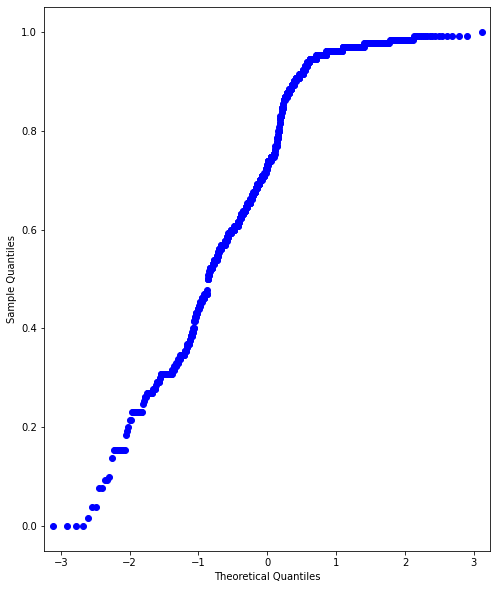

In [57]:
sm.qqplot(data_imp_scaled[:,0],)
plt.show()

E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Ma

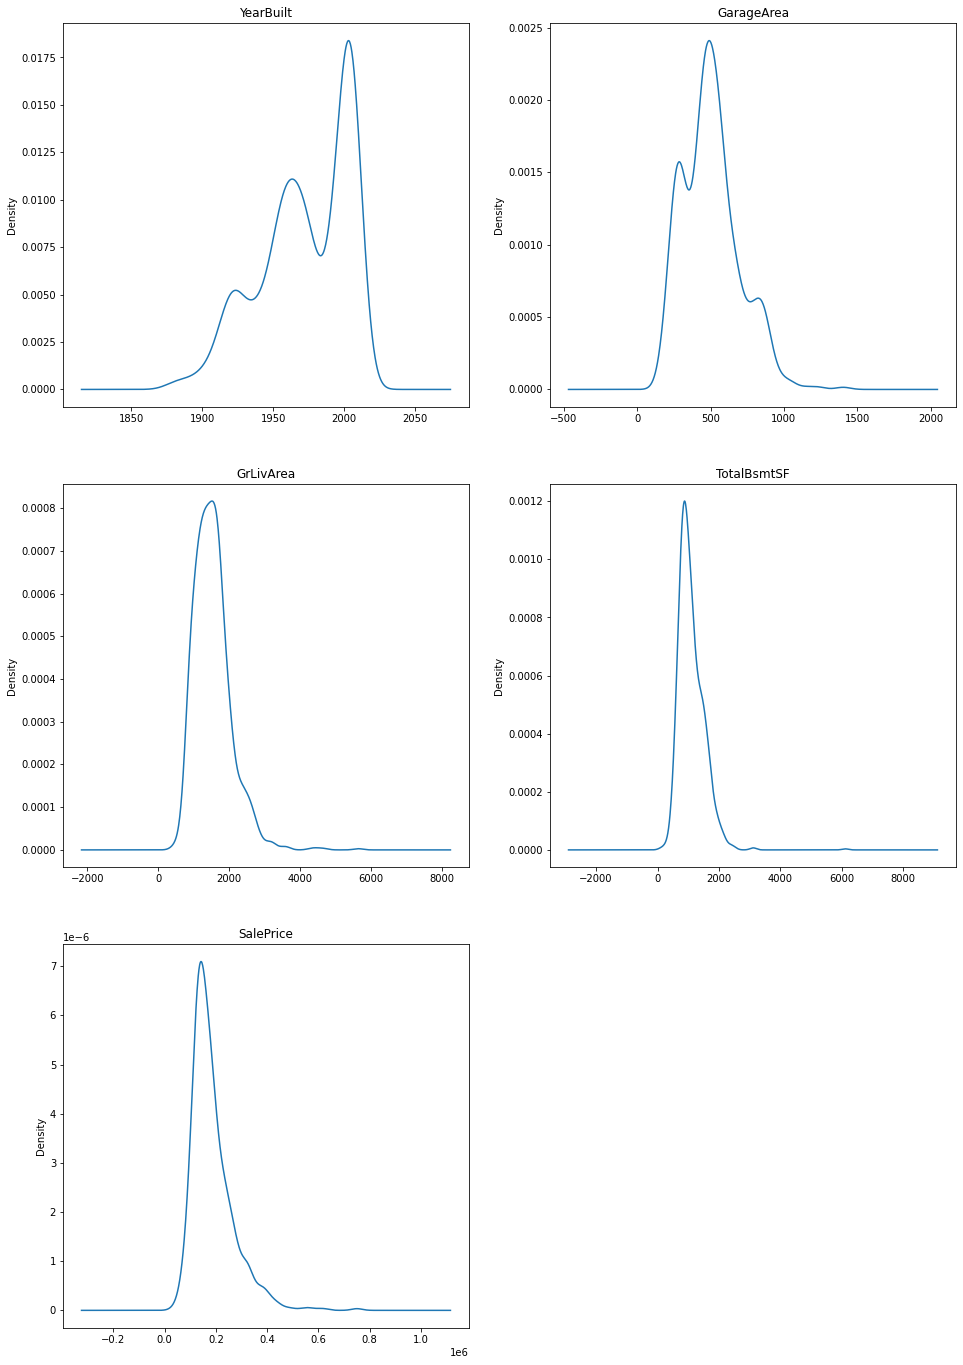

In [58]:
plt.figure(figsize=(16,24))
plt.subplot(321)
data_imp.YearBuilt.plot(kind = 'kde',title = 'YearBuilt')

plt.subplot(322)
data_imp.GarageArea.plot(kind = 'kde', title ='GarageArea')

plt.subplot(323)
data_imp.GrLivArea.plot(kind = 'kde', title = 'GrLivArea')

plt.subplot(324)
data_imp.TotalBsmtSF.plot(kind = 'kde', title='TotalBsmtSF')

plt.subplot(325)
data_pure_copy.SalePrice.plot(kind = 'kde', title='SalePrice')
plt.show()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(data_imp,data_pure_copy.SalePrice, random_state = 42, test_size = 0.3)
data_imp_scaled = RobustScaler().fit_transform(X_train,y_train )


In [60]:
y_train_scaled = MinMaxScaler().fit_transform(y_train.values.reshape((-1,1))).reshape((-1))

In [61]:
y_train_scaled[0]

0.19542222015558927

In [62]:
ab =AdaBoostRegressor(random_state=42,n_estimators=30,base_estimator=rfc_fit,learning_rate=0.8 ).fit(data_imp_scaled, y_train_scaled)


In [63]:
data_test = RobustScaler().fit_transform(X_test)
y_test_scaled =MinMaxScaler().fit_transform(y_test.values.reshape(-1, 1)).reshape((-1))

In [64]:
y_test_scaled[1]

0.10158267370713026

In [65]:
y_pred = ab.predict(data_test)

In [66]:
ab.score(data_test, y_test_scaled)

0.7975897720071603

In [67]:
pd.DataFrame({'pred':y_pred, 'true':y_test_scaled})

,pred,true
0,0.148049,0.125903
1,0.113781,0.101583
2,0.163988,0.141639
3,0.114274,0.090138
4,0.092730,0.120180
5,0.250750,0.196002
6,0.094499,0.028622
7,0.502879,0.282258
8,0.174106,0.184558
9,0.324065,0.262953


In [68]:
data.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [69]:

imp_columns

['Neighborhood',
 'Heating',
 'BldgType',
 'HouseStyle',
 'BsmtFinType1',
 'YearBuilt',
 'YearRemodAdd',
 'GarageArea',
 'GrLivArea',
 'MasVnrArea',
 'WoodDeckSF',
 'TotalBsmtSF',
 'BsmtFinSF1',
 'ScreenPorch',
 '1stFlrSF']

In [70]:
data_copy = data.dropna(axis=1)
for c in imp2:
    data_copy[c] = le.fit_transform(data_copy[c])
X_train, X_test, y_train, y_test = train_test_split(data_copy[imp2], data_copy.SalePrice, random_state=42, test_size = 0.3)
ab =AdaBoostRegressor(random_state=42,n_estimators=30,base_estimator=rfc_fit,learning_rate=0.8 ).fit(X_train, y_train)
ab.score(X_test, y_test)

C:\Users\98914\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0.865682898057936

In [71]:
y_pred = ab.predict(X_test)
pd.DataFrame({'y_true':y_test, 'y_pred':y_pred})

,y_true,y_pred
892,154500,137432.333333
1105,325000,308002.840000
413,115000,117437.333333
522,159000,153024.333333
1036,315500,249422.906667
614,75500,86706.000000
218,311500,188721.266667
1160,146000,152444.213333
649,84500,86018.000000
887,135500,126179.093333


In [72]:
mean_absolute_error(y_test, y_pred)

20667.741171993912

In [73]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [74]:
data_copy = data.copy()


for c in data_copy.select_dtypes(object).columns:
    data_copy[c].fillna('NNN', inplace=True)
# #     print(c)
    le = LabelEncoder()
    data_copy[c] = le.fit_transform(data_copy[c])
    try:
        data_copy[c][data_copy[c]==list(le.classes_).index('NNN')] = np.nan
    except:
        pass
imp_mean = IterativeImputer(random_state=0, initial_strategy= 'mean')
data_copy = imp_mean.fit_transform(data_copy)
# # data_copy.head()

C:\Users\98914\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [75]:

X = data_copy[:,:-1]
Y= data_copy[:,-1]
X = RobustScaler().fit_transform(X)
X_train, X_test, y_train , y_test = train_test_split(X,Y, random_state = 42, test_size= 0.3)
rfc_model = RandomForestRegressor(criterion= 'mae',
 max_features= 'auto',
 n_estimators= 150,
 random_state= 42, min_samples_split=2)
rfc_model.fit(X_train, y_train)
rfc_model.score(X_test, y_test)
d = list(rfc_model.feature_importances_>0.01)
d2 = list(compress(np.arange(len(d)), d))

ab =AdaBoostRegressor(random_state=42,n_estimators=30,base_estimator=RandomForestRegressor(criterion= 'mae',
 max_features= 'auto',
 n_estimators= 30,
 random_state= 42, min_samples_split=2),learning_rate=0.8 ).fit(X_train[:,d2], y_train)
ab.score(X_test[:,d2], y_test)
# 0.9559331701270242
#0.9574533388399986
# 0.9669342842324774 with feature importance>0.01
# 0.9649908321543258 without feature importance

0.9669342842324774

In [76]:
y_pred = rfc_model.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
pd.DataFrame({
    'y_true':y_test,
    'y_pred':y_pred
}).head()

# 11661.659398782343
# 11638.720601217656

11638.720601217656


,y_true,y_pred
0,154500.0,140703.646667
1,325000.0,305177.840000
2,115000.0,117045.466667
3,159000.0,161276.900000
4,315500.0,290111.133333


In [143]:
ab.base_estimator.

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state')

In [77]:
data.columns[d2]

Index(['LotFrontage', 'LotArea', 'Alley', 'OverallQual', 'YearBuilt',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'GarageFinish', 'GarageCars', 'GarageArea', 'PoolQC', 'MiscFeature'],
      dtype='object')

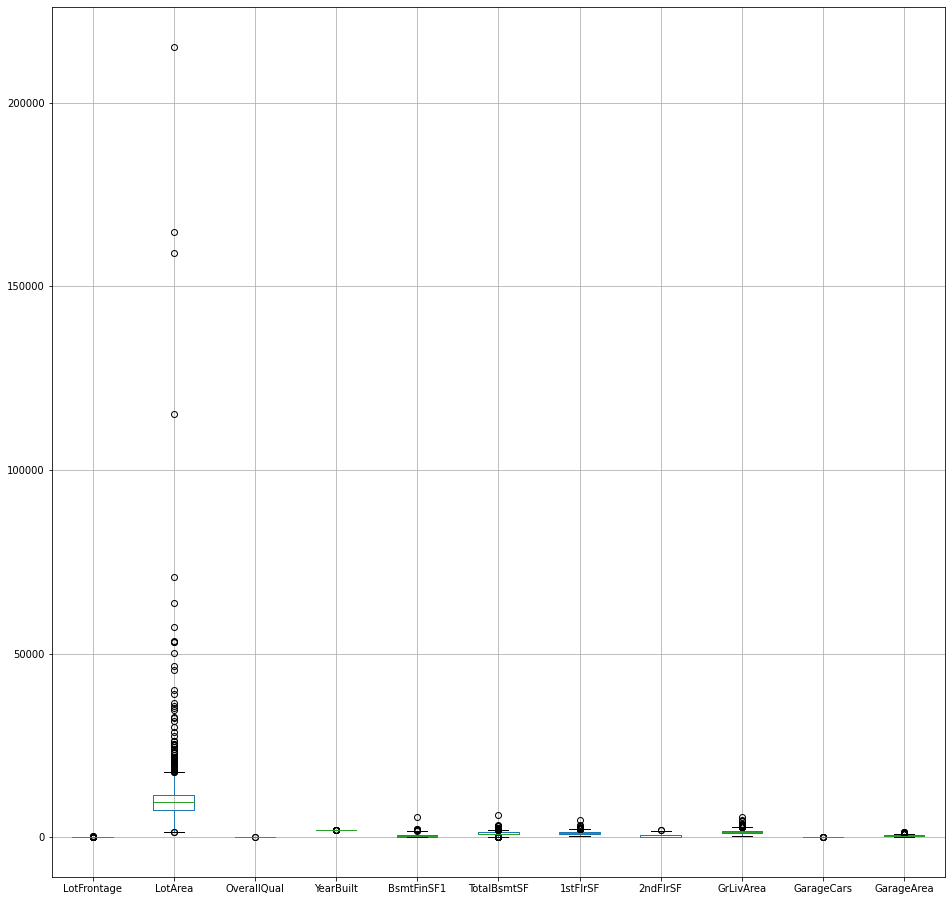

In [78]:
plt.figure(figsize=(16,16))
data[data.columns[d2]].boxplot()
plt.show()

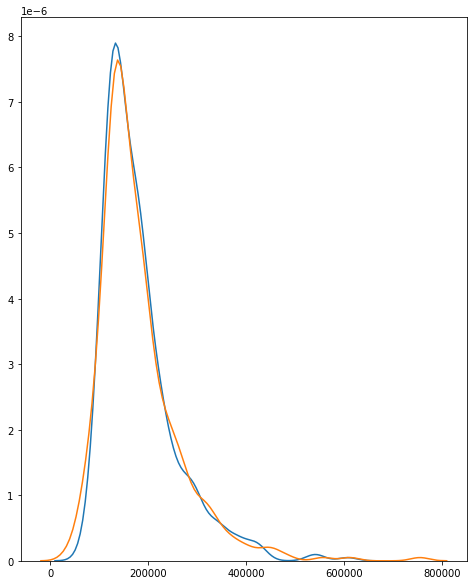

In [79]:
sns.kdeplot(y_pred)
sns.kdeplot(y_test)

In [80]:
## Outlier

In [81]:
od = IsolationForest(contamination=0.1)

In [82]:
X_train_o = pd.DataFrame(X_train, columns=data.columns[:-1])

In [83]:
X_train_o.drop('Id',axis=1, inplace=True)
X_train_o.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.6,0.0,0.476190,0.227643,0.0,0.322686,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.356335,1.453324,-0.059068,0.0,-0.333333,0.0,0.0,0.0
1,2.6,1.0,-1.666667,-1.433671,0.0,0.352350,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.179208,0.327572,-0.003618,0.0,-0.333333,-1.0,0.0,0.0
2,0.2,-2.0,0.095238,-0.207139,0.0,0.672552,0.000000,0.0,0.0,0.0,...,0.0,0.0,-0.014409,-0.549782,0.830404,0.0,0.000000,1.0,-6.0,0.0
3,-0.6,0.0,0.666667,0.541378,0.0,2.008782,-1.000000,0.0,0.0,-2.0,...,0.0,0.0,1.626622,-0.683627,1.581046,0.0,-1.000000,-0.5,0.0,0.0
4,0.2,0.0,-1.285714,0.293602,0.0,0.141035,-0.666667,0.0,0.0,-1.5,...,0.0,0.0,-1.223881,-0.374141,0.822544,0.0,-0.666667,0.5,-3.0,0.0


In [84]:
y_hat= od.fit_predict(X_train_o)

E:\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
E:\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [85]:
(y_hat==-1).sum()

103

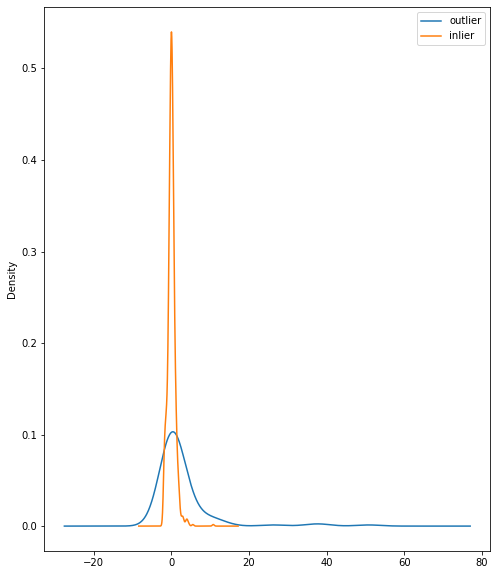

In [86]:
X_train_o[y_hat==-1].LotArea.plot(kind='kde')
X_train_o[y_hat==1].LotArea.plot(kind='kde')
plt.legend(['outlier', 'inlier'])
plt.show()

E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
E:\anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Ma

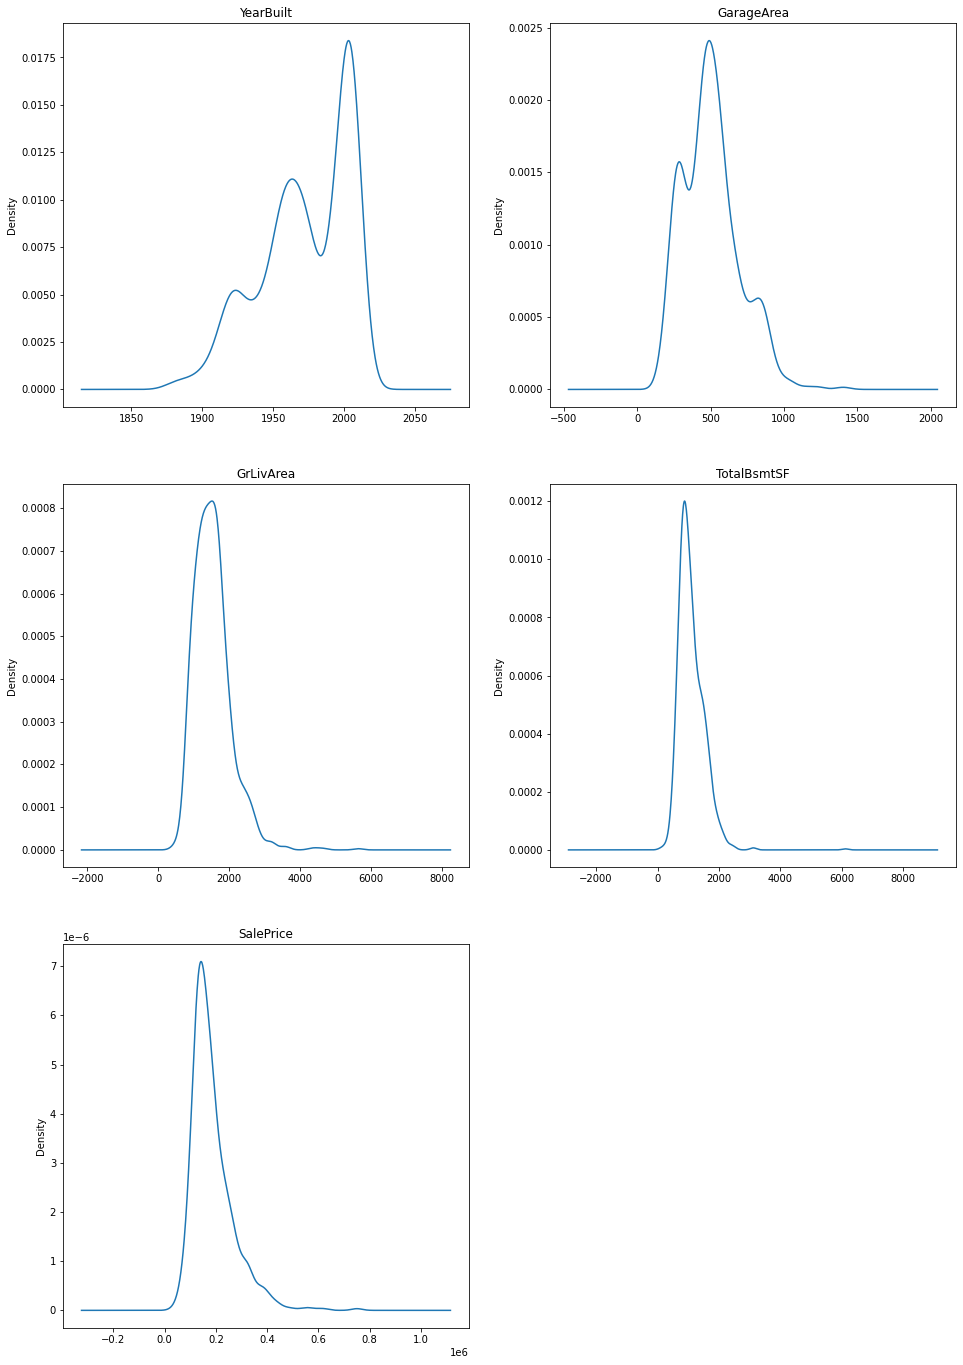

In [88]:
plt.figure(figsize=(16,24))
plt.subplot(321)
data_imp.YearBuilt.plot(kind = 'kde',title = 'YearBuilt')

plt.subplot(322)
data_imp.GarageArea.plot(kind = 'kde', title ='GarageArea')

plt.subplot(323)
data_imp.GrLivArea.plot(kind = 'kde', title = 'GrLivArea')

plt.subplot(324)
data_imp.TotalBsmtSF.plot(kind = 'kde', title='TotalBsmtSF')

plt.subplot(325)
data_pure_copy.SalePrice.plot(kind = 'kde', title='SalePrice')
plt.show()

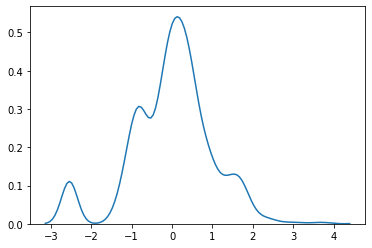

In [119]:
power = PowerTransformer(method='yeo-johnson')
garageArea = power.fit_transform(data.GarageArea.values.reshape((-1,1)))
sns.kdeplot(garageArea.reshape((-1)))
# sns.kdeplot(data_imp.GarageArea)

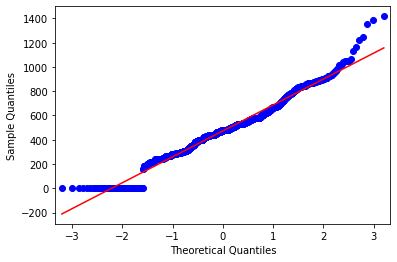

In [120]:
sm.qqplot(data.GarageArea,line='s')
plt.show()

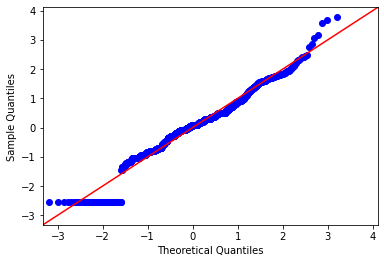

In [123]:

sm.qqplot(garageArea.reshape((-1)), line = '45')
plt.show()

In [125]:
qt = QuantileTransformer(output_distribution='normal')

In [127]:
yb = qt.fit_transform(data.YearBuilt.values.reshape((-1,1)))

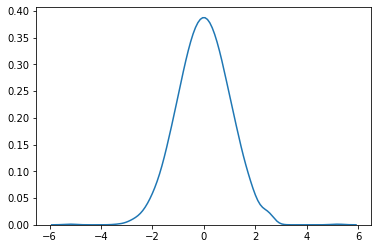

In [128]:
sns.kdeplot(yb.reshape((-1)))

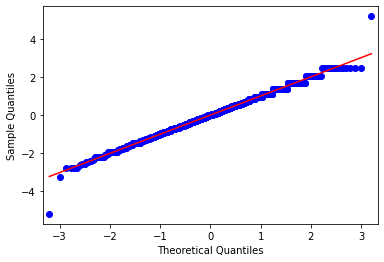

In [130]:
sm.qqplot(yb.reshape((-1)), line='s')
plt.show()

In [167]:
import pickle
from joblib import dump, load
import bz2


In [180]:
dump(ab,'adaboostmodel_small.joblib',compress=1)

['adaboostmodel_small.joblib']

In [181]:
rgr = load('adaboostmodel_small.joblib')

In [150]:
X_test[0].shape

(80,)

In [182]:
rgr.predict([X_test[0,d2]])

array([142528.33333333])

In [164]:
out = open('ada2', 'wb')
pickle.dump(ab,out)
out.close()

In [165]:
infile = open('ada2', 'rb')
rgr = pickle.load(infile)
infile.close()

In [166]:
rgr.predict([X_test[0,d2]])

array([142528.33333333])

In [171]:
sfile = bz2.BZ2File('ada2_smaller', 'w')
pickle.dump(ab, sfile)

In [178]:
insfile = bz2.BZ2File('ada2_smaller','r')
rgr2 = pickle.load(insfile)

In [179]:
rgr2.predict([X_test[0,d2]])

array([142528.33333333])